In [1]:
import pandas as pd
customer_master = pd.read_csv('../rawdata/customer_master.csv')

In [2]:
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [3]:
item_master = pd.read_csv('../rawdata/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [4]:
transaction_1 = pd.read_csv('../rawdata/transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [5]:
transaction_detail_1 = pd.read_csv('../rawdata/transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [6]:
transaction_2 = pd.read_csv('../rawdata/transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2], ignore_index = True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [7]:
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [11]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [8]:
transaction_detail_2 = pd.read_csv('../rawdata/transaction_detail_2.csv')

In [13]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [14]:
join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], on = 'transaction_id', how = 'left')

In [15]:
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [16]:
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


In [17]:
join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [18]:
join_data["price"] = join_data["quantity"] * join_data["item_price"]
join_data[["quantity", "item_price", "price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [19]:
print(join_data["price"].sum())

971135000


In [20]:
print(transaction["price"].sum())

971135000


In [21]:
join_data["price"].sum() == transaction["price"].sum()

True

In [22]:
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [23]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [25]:
print(join_data["payment_date"].min())
print(join_data['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


In [26]:
join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

In [27]:
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [28]:
join_data.groupby("payment_month").sum()["price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [29]:
join_data.groupby(["payment_month", "item_name"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [31]:
pd.pivot_table(join_data, index="item_name", columns="payment_month", values=["price", "quantity"], aggfunc="sum")

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

In [32]:
graph_data = pd.pivot_table(join_data, index="payment_month", columns="item_name", values="price", aggfunc="sum")

In [33]:
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


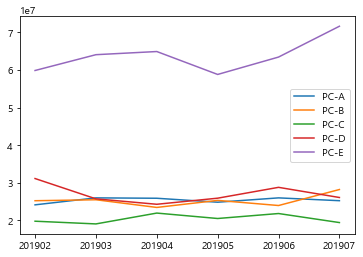

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"], label="PC-A")
plt.plot(list(graph_data.index), graph_data["PC-B"], label="PC-B")
plt.plot(list(graph_data.index), graph_data["PC-C"], label="PC-C")
plt.plot(list(graph_data.index), graph_data["PC-D"], label="PC-D")
plt.plot(list(graph_data.index), graph_data["PC-E"], label="PC-E")
plt.legend()